# WPA 10 - Loops and Functions

In this WPA, you will analyze data from another fake study. In this fake study the researchers were interested in whether playing video games had cognitive benefits compared to other leisure activities. In the study, 90 University students were asked to do one of 3 leisure activities for 1 hour a day for the next month. 30 participants were asked to play visio games, 30 to read and 30 to juggle. At the end of the month each participant did 3 cognitive tests, a problem solving test (**logic**) and a reflex/response test (**reflex**) and a written comprehension test (**comprehension**).

### A. Data loading and preparation

1. Open a new script and enter your name, date, and the wpa number at the top. Set the working directory to the appropriate location using `setwd` (or add the script to your R Project). Save the script in the `R` folder in your project working directory as `wpa_10_LASTFIRST.R`, where LAST and FIRST are your last and first names. 

2. The data are situated here: https://github.com/laurafontanesi/RcourseSpring2019/blob/master/data/data_wpa10.txt Download them in the data subfolder (situated in your R project folder) and load them in R **or** load them direclty from github (remember to get the "raw" data page first...). In both cases, the loaded data should be assigned to the variable name `leisure`.

3. Look at the first few rows of the dataframe with the `head()` function to make sure it loaded correctly.

4. How many rows and columns are there in the two dataframes? Use the `dim()` function to reply to this question.

In [1]:
# 2
leisure <- read.table('https://raw.githubusercontent.com/laurafontanesi/RcourseSpring2019/master/data/data_wpa10.txt')

# 3
head(leisure)

# 4
dim(leisure)

id,age,gender,activity,logic,reflex,comprehension
1,26,m,reading,88,13.7,72
2,31,m,reading,85,11.8,83
3,38,m,reading,82,5.8,67
4,24,m,reading,102,18.0,66
5,30,f,reading,48,14.0,62
6,31,m,reading,61,14.1,58


[1] 90  7

#### Datafile description

The data file has 90 rows and 7 columns. Here are the columns

- `id`: The participant ID

- `age`: The age of the participant

- `gender`: The gender of the particiant

- `activity`: Which leisure activity the participant was assigned for the last month ("reading", "juggling", "gaming")

- `logic`: Score out of 120 on a problem solving task. Higher is better.

- `reflex`: Score out of  25 on a reflex test. Higher indicates faster reflexes.

- `comprehension`: Score out of 100 on a reading comprehension test. Higher is better.

## B. Basic Custom Functions
Before preceding, if you haven't already look at the help file for `function` do so (`help("function")`).

1. Write a function called `feed.me()` that takes a string `food` as an argument, and returns (in case `food = 'pizza'`) the sentence "I love to eat pizza". Try your function by running `feed.me("apples")` (it should then return "I love to eat apples").

2. Without using the `mean()` function, calculate the mean of the vector `vec.1 <- seq(1, 100, 5)`. (Hint: use `sum` and `length`)

3. Write a function called `my.mean()` that takes a vector `x` as an argument, and returns the mean of the vector `x`. Use your code for Question B2 as your starting point. Test it on the vector from Question B2.

4. Try your `my.mean()` function to calculate the mean 'logic' rating of participants in the `leisure` dataset and compare the result to the built-in `mean()` function (using `==`) to make sure you get the same result!

In [2]:
#1
feed.me <- function(food) {
  
  output <- paste("I love to eat ", food)
  
  print(output)
}

feed.me(food = "apples")

#2
vec.1 <- seq(1, 100, 5)

sum(vec.1)/length(vec.1)

#3
my.mean <- function(x) {
  
  result <- sum(x) / length(x)
  
  return(result)
}

my.mean(vec.1)

#4
mine<-my.mean(leisure$logic)
existing<-mean(leisure$logic)
mine==existing

[1] "I love to eat  apples"


[1] 48.5

[1] 48.5

[1] TRUE

## C. Basic Loops

1. Create a loop that prints the squares of integers from 1 to 10.

2. Modify the previous code so that it saves the squared integers as a vector called `squares`. You'll need to pre-create a vector, and use indexing to update it.

In [3]:
#1
for(i in 1:10) {
  
  square.i <- i^2
  
  print(square.i)
  
}

#2
squares<- c()
for(i in 1:10) {
  
  squares[i] <- i^2
  
}
squares

[1] 1
[1] 4
[1] 9
[1] 16
[1] 25
[1] 36
[1] 49
[1] 64
[1] 81
[1] 100


[1]   1   4   9  16  25  36  49  64  81 100

## D. From Manual code to Loops to Functions
In this section you are going to start with a basic task you want to perform. In this case we want to create a copy of our dataset where all the test variables (`logic`, `reflex` and `comprehension`) have all been normalized. We will us this task firstly to demonstrate the benefit of using loops, then the benefit of using custom functions.

1. Firstly create a copy of the data.frame `leisure`. Call this copy `zleisure.manual`.

2.  Using indexing of the column name, normalise the `logic` column in your new dataset. Do not create a new column, just overwrite the `logic` column with the normalised zcores. Remember that to normalse a score, also called z-transforming it, you first subtract the mean score from the individual scores, then divide by the standard deviation.

3. Use the same method to normalise the other test columns; `reflex`, and `comprehension`.

4. Create another copy of the `leisure` data.frame called `zleisure.loop`. We will perform the same normalisation on this data.frame using a simple loop.

5. First create a loop that loops through each of the test column names  (i.e. `logic`, `reflex` and `comprehension`). This will require a vector of the test column. For now have the loop print each column name as it goes through (using `print`). The output should look as follows.

6. Now modify the loop from Question D5 so that each time it loops through it takes the named column and replaces the values in this column with the normalised scores. You already have a loop to go through the column names, and code that takes a column based on its name and repalces the values in that column with the normalzied values (see Qu D2/D3). All you need to do is combine them.

7. Check that the `logic` column you normalised manually is the same as the `logic` column normalized by the loop using `==`.

8. What if we decided that we also want to normalise the particpants ages. How easy is this to do in our loop?

9. Now we have a loop that takes the data.frame `zleisure.loop` and for the 4 columns `age`, `logic`, `reflex` and `comprehension` it replaces the raw scores in that column with the z-transformed/normalized scores. This code seems pretty good, it only take 2 lines, and is much easier than typing out the code to normalize each column manually. It can also e easily expanded to include new columns. However, what if we wanted to perform the same operation on another dataset? Load the fictional survey data from **WPA6**. Call it `wpa6.df`.

10. This data.frame also has several test scores we might want to normalize, in particular the `iq`, `logic` and `multitasking` scores. Write a loop to normalise these scores (use your zleisure loop as a start point). Call the data.frame with the normalised scores `zwpa6.df`.

11. There should be only 3 differences between the code in question D6, and the code in question D10. The only changes are the names of the data.frames (`wpa6.df` verse `leisure`; and `zwpa6.df` verse `zleisure.loop`) and the names of the columns. The actual operations being performed are identical, and the structure of the code is identical. When this happens its usually a pretty good sign that you should write a custom functon to perform this operation, rather than modifying your code each time. So now we are going to create a function, which we'll call `zbycolumn`, which takes any data.frame and from that creates a new data.frame where the values in a subset of the columns are z.transformed. Since we want to be able to specify the data.frame and the columns that are to be z.transformed this function will need to accept two arguments, the data.frame (which we will call `data`) and the columns that are to be z.transformed (which we will call `colunnames`). Create an empty function that accepts these two arguments. Now that you have a function that accepts the appropriate arguments, modify your code from exercise D10 so that it uses these arguments names rather than the `wpa6.df` and `iq`, `logic` etc.. Call the z.transformed version of the `data`, `z.data`. Now place this code inside the empty function you created. remember to add a `return` argument.

12. Test your function by performing the normalisation on the `leisure` data.frame again. Call the output of the function `zleisure.function` and compare it to the manual or loop versions of the dataframe.

In [4]:
# 1
zleisure.manual <- leisure

# 2
zleisure.manual[,"logic"]<- (leisure[,"logic"] - mean(leisure[,"logic"]) )/sd(leisure[,"logic"])

# 3
zleisure.manual[,"reflex"]<- (leisure[,"reflex"] - mean(leisure[,"reflex"]) )/sd(leisure[,"reflex"])
zleisure.manual[,"comprehension"]<- (leisure[,"comprehension"] - mean(leisure[,"comprehension"]) )/sd(leisure[,"comprehension"])

# 4
zleisure.loop <- leisure

# 5
for (i in c("logic", "reflex", "comprehension")){

  print(i)
}

# 6
for (i in c("logic", "reflex", "comprehension")){
  zleisure.loop[,i]<- (leisure[,i] - mean(leisure[,i]) )/sd(leisure[,i])
}

# 7
mean(zleisure.loop$logic==zleisure.manual$logic)

# 8
for (i in c("age", "logic", "reflex", "comprehension")){
  zleisure.loop[,i]<- (leisure[,i] - mean(leisure[,i]) )/sd(leisure[,i])
}

# Very easy. All you need to do is add age to the index vector.
# This is much easier than copying the code in question 12 and modifying it for age as well.

# 9
wpa6.df <- read.csv('~/git/RcourseSpring2019/data/data_wpa6.csv')
head(wpa6.df)

# 10
zwpa6.df <- wpa6.df

for (i in c("logic", "iq", "multitasking")){
  zwpa6.df[,i]<- (wpa6.df[,i] - mean(wpa6.df[,i]) )/sd(wpa6.df[,i])
}

# 11
zbycolumn <- function(data, columnnames){
    z.data<-data
    for (i in columnnames){
        z.data[, i]<- (data[,i]-mean(data[,i]))/sd(data[,i])
    }
    return(z.data)
}

# 12
zleisure.function <- zbycolumn(data=leisure, columnnames=c("age", "logic", "reflex", "comprehension"))

mean(zleisure.function$logic==zleisure.manual$logic)

[1] "logic"
[1] "reflex"
[1] "comprehension"


[1] 1

sex,age,major,haircolor,iq,country,logic,siblings,multitasking,partners,marijuana,risk
m,22,economics,blonde,106,switzerland,10.994999,1,69,6,1,0
m,20,psychology,brown,107,germany,9.472549,1,49,4,1,1
f,23,chemistry,brown,109,austria,10.370062,3,50,11,1,1
m,27,psychology,blonde,114,switzerland,7.001693,3,50,14,1,0
m,18,psychology,black,113,switzerland,11.193795,2,61,0,1,1
m,25,chemistry,blonde,108,switzerland,10.842352,2,37,14,1,0


[1] 1

## E. Functions and Figures

1. Create a scatterplot of `age` and `reflex` of participants in the `leisure` datset. Cutomise it, and add gridlines and a regression line.

2. Create a function called `my.plot()` that takes arguments `x` and `y` and returns a customised scatterplot with gridlines and a regression line.

3. Now test your `my.plot()` function on the age and reflec of participants in the `leisure` dataset. It should look like the results of question E1.

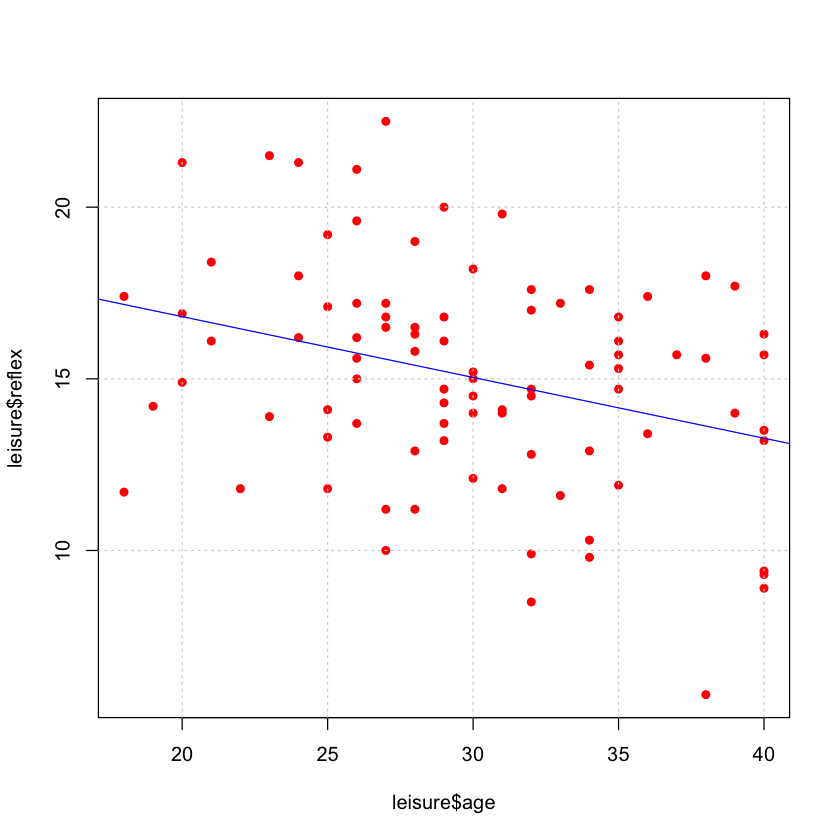

In [5]:
# 1
plot(x = leisure$age, 
   y = leisure$reflex, 
   pch = 16,     # look at ?points to see the values of pch!
   col = "red")

grid()   # Add gridlines

# Add a regression line
abline(lm(leisure$reflex ~ leisure$age), 
     col = "blue")

In [6]:
# 2
my.plot <- function(x, y) {
  
  plot(x = x, 
       y = y, 
       pch = 16,     # look at ?points to see the values of pch!
       col = "red")
  
  grid()   # Add gridlines
  
  # Add a regression line
  abline(lm(y ~ x), 
         col = "blue")
}

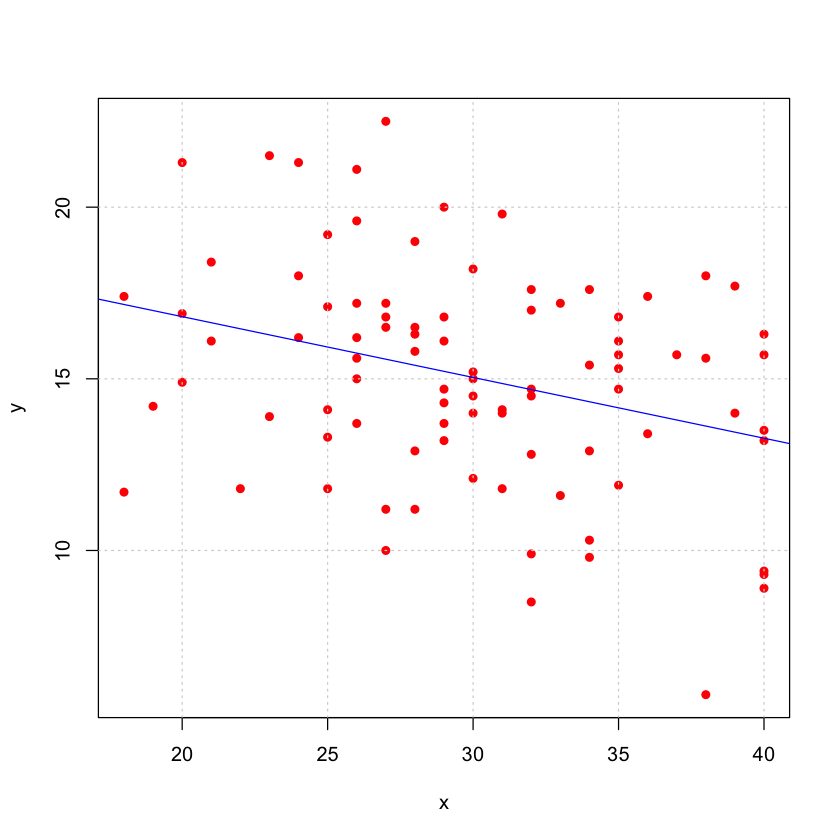

In [7]:
my.plot(x=leisure$age, y=leisure$reflex)

## F. More Loops

1. Create a loop that calculates (and prints) the mean `logic` score of participants from each `activity` `group`.
2. Now create a histogram of comprehension scores for each activity using the following structure:

In [ ]:
par(mfrow = c(1, 3)) # Set up 1 x 3 plotting grid

for(activity.i in c("reading", "juggling", "gaming")) {
  
  hist(lesiure$comprehension[leisure$activity == ___],
       main = ___,
       xlab = ___,
       col = ___
       )
  
}

par(mfrow = c(1, 1)) # Reset plotting grid

In [8]:
# 1
for(activity.i in c("reading", "juggling", "gaming")) {
  
  data.i <- leisure$logic[leisure$activity == activity.i]
  
  output <- paste0("The mean logic score of people who do ", activity.i, " is ", round(mean(data.i),2) )
  
  print(output)
  
}

[1] "The mean logic score of people who do reading is 71.7"
[1] "The mean logic score of people who do juggling is 57.43"
[1] "The mean logic score of people who do gaming is 77.07"


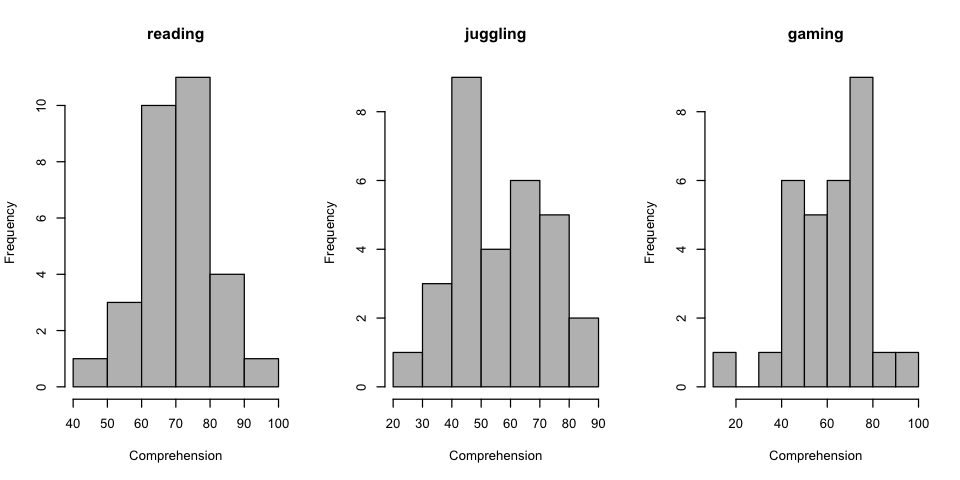

In [9]:
# 2

options(repr.plot.width=8, repr.plot.height=4) # this is not necessary in RStudio.

par(mfrow = c(1, 3)) # Set up 1 x 3 plotting grid

for(activity.i in c("reading", "juggling", "gaming")) {
  
  hist(leisure$comprehension[leisure$activity == activity.i],
       main = activity.i,
       xlab = "Comprehension",
       col = "grey"
       )
}

par(mfrow = c(1, 1)) # Reset plotting grid

## G. Function with Loops

1. Create a loop that returns the sum of the vector `1:10`. (i.e. Don't use the existing `sum` function).
2. Use this loop to create a function, called `my.sum` that returns the sum of any vector x. Test it on the `logic` ratings.
3. Modify the function you created in question G2, to instead calculate the mean of a vector. Call this new function `my.mean2` and compare it to both the `my.mean` function you created, and the in-built `mean` function. (Bonus: Can you also think of a way to do this without using the the length function)

In [10]:
# 1
sums <- 0
for (i in 1:10){
  sums <- sums + i
}
sums

# 2
my.sums <- function(x){
  sums<- 0
  for (i in x){
    sums <- sums + i
  }
  return(sums)
}

my.sums(leisure$logic)

# 3
my.mean2 <- function(x){
  sums <- 0
  for (i in x){
    sums <- sums + i
  }
  result = sums/length(x)
  return(result)
}

my.mean2(leisure$logic)

## Or without using length
my.mean2 <- function(x){
  sums <- 0
  length.x <- 0
  for (i in x){
    sums <- sums + i
    length.x <- length.x + 1
  }
  result <- sums/length.x
  return(result)
}

[1] 55

[1] 6186

[1] 68.73333

## H. Simulation!

1. What is the probability of getting a significant p-value if the null hypothesis is true? Test this by conducting the following simulation:

  - Create a vector called `p.values` with 100 NA values. 
  - Draw a sample of size 10 from a normal distribution with mean = 0 and standard deviation = 1.
  - Do a one-sample t-test testing if the mean of the distribution is different from 0. Save the p-value from this test in the 1st position of `p.values`.
  - Repeat these steps with a loop to fill `p.values` with 100 p-values.
  - Create a histogram of `p.values` and calculate the proportion of `p-values` that are significant at the .05 level.
2. Create a function called `psimulation` with 4 arguments: `sim`: the number of simulations, `samplesize`: the sample size, `mu.true`: the true mean, and `sd.true`: the true standard deviation. Your function should repeat the simulation from the previous question with the given arguments. That is, it should calculate `sim` p-values testing whether `samplesize` samples from a normal distribution with mean = `mu.true` and standard deviation = `sd.true` is significantly different from 0. The function should return a vector of p-values. 

In [ ]:
# Template for question H1:

p.values <- rep(NA, ___)

for(i in ___) {

    x <- rnorm(n = ___, mean = ___, sd = ___)

    result <- t.test(___)$___

    p.values[___] <- ___

}

[1] 0.08

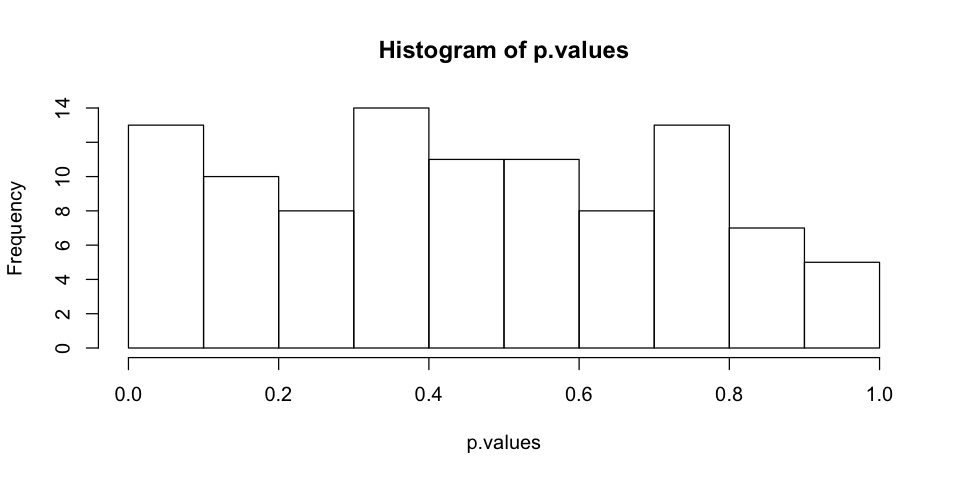

In [11]:
# 1
p.values <- rep(NA, 100)

for(i in 1:100) {

    x <- rnorm(n = 10, mean = 0, sd = 1)  #Draws a sample

    result <- t.test(x)$p.value     # Calculate the p.vale for that sample

    p.values[i] <- result     #Places the p.value in position i of the vector.

}

proportionsig<- mean(p.values< 0.05)
proportionsig
hist(p.values)

In [12]:
# 2
psimulation <- function(sim, samplesize, mu.true, sd.true){
  p.values <- rep(NA, sim)

  for(i in 1:sim) {

    x <- rnorm(n = samplesize, mean = mu.true, sd = sd.true)

    result <- t.test(x)$p.value

    p.values[i] <- result

  }
  return(p.values)
}

In [13]:
sim_n5 <- psimulation(
    sim = 10000,
    samplesize = 5,
    mu.true = 0,
    sd.true = .5
)

sim_n500 <- psimulation(
    sim = 10000,
    samplesize = 500,
    mu.true = 0,
    sd.true = .5
)

In [15]:
mean(sim_n5 < .05)
mean(sim_n500 < .05)

[1] 0.0502

[1] 0.0451

### That's it! Now it's time to submit your assignment!

Save and email your `wpa_10_LastFirst.R` file to me at [laura.fontanesi@unibas.ch](mailto:laura.fontanesi@unibas.ch). 

Assignments sent after Sunday 12th May will not be considered (to pass the course you have to hand in all assignments for each week). 